# 1. Dataset - Features(Columns) Description
   1. vendor name: 30 
      (adviser, amdahl,apollo, basf, bti, burroughs, c.r.d, cambex, cdc, dec, 
       dg, formation, four-phase, gould, honeywell, hp, ibm, ipl, magnuson, 
       microdata, nas, ncr, nixdorf, perkin-elmer, prime, siemens, sperry, 
       sratus, wang)
   2. Model Name: many unique symbols
   3. MYCT: machine cycle time in nanoseconds (integer)
   4. MMIN: minimum main memory in kilobytes (integer)
   5. MMAX: maximum main memory in kilobytes (integer)
   6. CACH: cache memory in kilobytes (integer)
   7. CHMIN: minimum channels in units (integer)
   8. CHMAX: maximum channels in units (integer)
   9. PRP: published relative performance (integer)


# 2.Importing the Libraries
 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 3. Exploring the Dataset


In [2]:
df = pd.read_excel("ComputerHardwareData.xlsx")

In [3]:
df

,Unnamed: 0,VendorName,ModelName,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP
0,0,adviser,32/60,125,256,6000,256,16,128,198
1,1,amdahl,470v/7,29,8000,32000,32,8,32,269
2,2,amdahl,470v/7a,29,8000,32000,32,8,32,220
3,3,amdahl,470v/7b,29,8000,32000,32,8,32,172
4,4,amdahl,470v/7c,29,8000,16000,32,8,16,132
...,...,...,...,...,...,...,...,...,...,...
204,204,sperry,80/8,124,1000,8000,0,1,8,42
205,205,sperry,90/80-model-3,98,1000,8000,32,2,8,46
206,206,sratus,32,125,2000,8000,0,2,14,52
207,207,wang,vs-100,480,512,8000,32,0,0,67


# 4. Understanding the Data

In [4]:
df.describe()

,Unnamed: 0,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,104.000000,203.822967,2867.980861,11796.153110,25.205742,4.698565,18.267943,105.622010
std,60.477268,260.262926,3878.742758,11726.564377,40.628722,6.816274,25.997318,160.830733
min,0.000000,17.000000,64.000000,64.000000,0.000000,0.000000,0.000000,6.000000
25%,52.000000,50.000000,768.000000,4000.000000,0.000000,1.000000,5.000000,27.000000
50%,104.000000,110.000000,2000.000000,8000.000000,8.000000,2.000000,8.000000,50.000000
75%,156.000000,225.000000,4000.000000,16000.000000,32.000000,6.000000,24.000000,113.000000
max,208.000000,1500.000000,32000.000000,64000.000000,256.000000,52.000000,176.000000,1150.000000


In [5]:
df.shape

(209, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  209 non-null    int64 
 1   VendorName  209 non-null    object
 2   ModelName   209 non-null    object
 3   MYCT        209 non-null    int64 
 4   MMIN        209 non-null    int64 
 5   MMAX        209 non-null    int64 
 6   CACH        209 non-null    int64 
 7   CHMIN       209 non-null    int64 
 8   CHMAX       209 non-null    int64 
 9   PRP         209 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 16.5+ KB


In [7]:
df.columns

Index(['Unnamed: 0', 'VendorName', 'ModelName', 'MYCT', 'MMIN', 'MMAX', 'CACH',
       'CHMIN', 'CHMAX', 'PRP'],
      dtype='object')

In [8]:
df['VendorName'].unique()

array(['adviser', 'amdahl', 'apollo', 'basf', 'bti', 'burroughs', 'c.r.d',
       'cdc', 'cambex', 'dec', 'dg', 'formation', 'four-phase', 'gould',
       'hp', 'harris', 'honeywell', 'ibm', 'ipl', 'magnuson', 'microdata',
       'nas', 'ncr', 'nixdorf', 'perkin-elmer', 'prime', 'siemens',
       'sperry', 'sratus', 'wang'], dtype=object)

In [9]:
df.isnull()

,Unnamed: 0,VendorName,ModelName,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
204,False,False,False,False,False,False,False,False,False,False
205,False,False,False,False,False,False,False,False,False,False
206,False,False,False,False,False,False,False,False,False,False
207,False,False,False,False,False,False,False,False,False,False


In [10]:
df.isnull().sum()

Unnamed: 0    0
VendorName    0
ModelName     0
MYCT          0
MMIN          0
MMAX          0
CACH          0
CHMIN         0
CHMAX         0
PRP           0
dtype: int64

In [11]:
df.duplicated().sum()

0

# Task1: Univariate linear regression 

To Perform a univariate linear regression analysis to predict the 'PRP' based on the 'MMAX' attribute. 

Seperating the PRP and MMAX Attributes to another dataframe such that linear regression can be applied on that

In [12]:
df2 = df[['MMAX','PRP']]
df2

,MMAX,PRP
0,6000,198
1,32000,269
2,32000,220
3,32000,172
4,16000,132
...,...,...
204,8000,42
205,8000,46
206,8000,52
207,8000,67


Checking for the duplicates and null values in the dataset

In [13]:
df2.duplicated().sum()

35

In [14]:
df2 = df2.drop_duplicates()

In [15]:
df2.duplicated().sum()

0

# 1. Exploring the Data Analysis

In [16]:
import seaborn as sns
correlation_matrix=df2.corr(numeric_only=True)
print(correlation_matrix)

          MMAX       PRP
MMAX  1.000000  0.856872
PRP   0.856872  1.000000


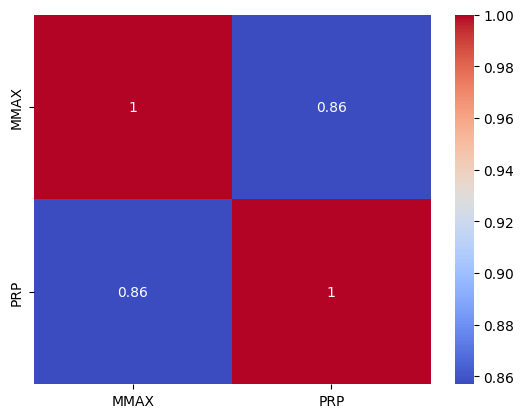

In [17]:
sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm')
plt.show()

c:\Users\yeswa\Envs\test\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


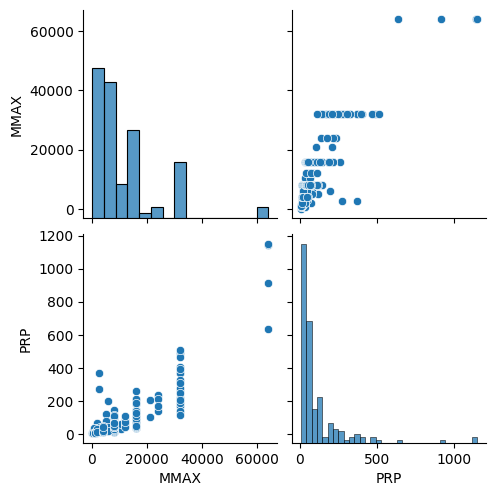

In [18]:
sns.pairplot(df2)
plt.show()

# 2. Spliting the data

We could already feed our X and y data directly to our linear regression model, but if we use all of our data at once, how can we know if our results are any good? Just like in learning, what we will do, is use a part of the data to train our model and another part of it, to test it

This is easily achieved through the helper train_test_split() method, which accepts our X and y arrays (also works on DataFrames and splits a single DataFrame into training and testing sets), and a test_size.

train_test_split() helper method from from _sklearn.model_selection import train_test_split_

test_size is the percentage of the overall data we'll be using for testing

Some common train-test splits are 80/20 and 70/30. Here I use 80/20

random_state = SEED = Some Number(42) = Splitting data into training/validation/test sets: random seeds ensure that the data is divided the same way every time the code is run


In [19]:
X = df2[['MMAX']]
y = df2[['PRP']]

In [20]:
X

,MMAX
0,6000
1,32000
2,32000
3,32000
4,16000
...,...
204,8000
205,8000
206,8000
207,8000


In [21]:
y

,PRP
0,198
1,269
2,220
3,172
4,132
...,...
204,42
205,46
206,52
207,67


# 3. Spliting the data

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=104,test_size=0.25)

In [23]:
print(X_test.shape)
print(X_train.shape)
print(y_test.shape)
print(y_train.shape)

(44, 1)
(130, 1)
(44, 1)
(130, 1)


In [24]:
X_train.head()

,MMAX
45,8000
150,16000
49,8000
62,1000
0,6000


In [25]:
X_test.head()

,MMAX
79,12000
34,20970
185,8000
135,16000
206,8000


# 4. Training the Model

In [26]:
model = LinearRegression()

In [27]:
model.fit(X_train,y_train)

LinearRegression()

In [28]:
model.coef_

array([[0.01135475]])

In [29]:
model.intercept_

array([-30.56015579])

In [30]:
print("Regression Equation: PRP =", model.intercept_, "+", model.coef_[0], "* MMAX")


Regression Equation: PRP = [-30.56015579] + [0.01135475] * MMAX


# 5. Testing the model

In [31]:
y_pred = model.predict(X_test)

In [32]:
print(y_test.shape)

(44, 1)


In [33]:
print(y_pred.shape)

(44, 1)


# 6. Evaluation of the model

In [34]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)

In [35]:
print(mae)
print(mse)
print(rmse)

59.09163767852997
10046.735474177536
100.23340498146082


In [36]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.7155011096425132


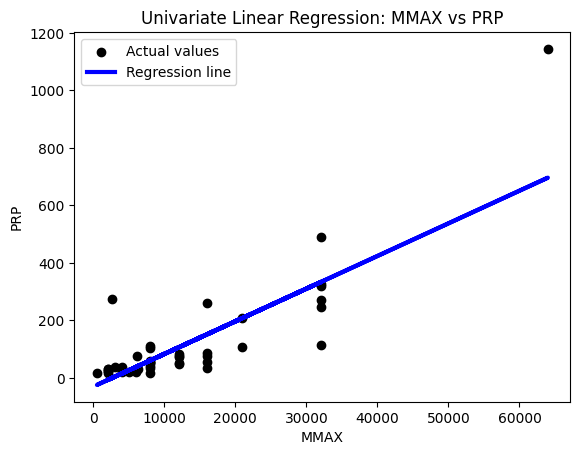

In [37]:
plt.scatter(X_test, y_test, color='black', label='Actual values')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Regression line')
plt.xlabel('MMAX')
plt.ylabel('PRP')
plt.title('Univariate Linear Regression: MMAX vs PRP')
plt.legend()
plt.show()


# Task 2: Multiple Linear Regression 
- Develop a multiple linear regression model to predict 'PRP' based on 'MMAX', 'CACH', and 'MYCT'. 

In [38]:
df3 = df[['MMAX','CACH','MYCT','PRP']]
df3

,MMAX,CACH,MYCT,PRP
0,6000,256,125,198
1,32000,32,29,269
2,32000,32,29,220
3,32000,32,29,172
4,16000,32,29,132
...,...,...,...,...
204,8000,0,124,42
205,8000,32,98,46
206,8000,0,125,52
207,8000,32,480,67


In [39]:
df3.duplicated().sum()

2

In [40]:
df3= df3.drop_duplicates()

In [41]:
df3.duplicated().sum()

0

# 1. Exploring the Data Analysis 
- Evaluate the multicollinearity among the predictors. 


In [42]:
import seaborn as sns
correlation_matrix=df3.corr(numeric_only=True)
print(correlation_matrix)

          MMAX      CACH      MYCT       PRP
MMAX  1.000000  0.533905 -0.371345  0.860845
CACH  0.533905  1.000000 -0.316744  0.661217
MYCT -0.371345 -0.316744  1.000000 -0.301698
PRP   0.860845  0.661217 -0.301698  1.000000


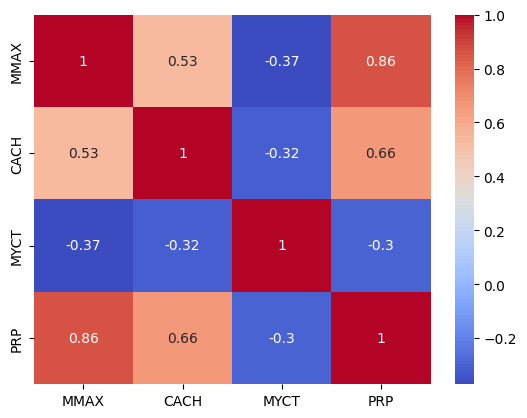

In [43]:
sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm')
plt.show()

c:\Users\yeswa\Envs\test\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


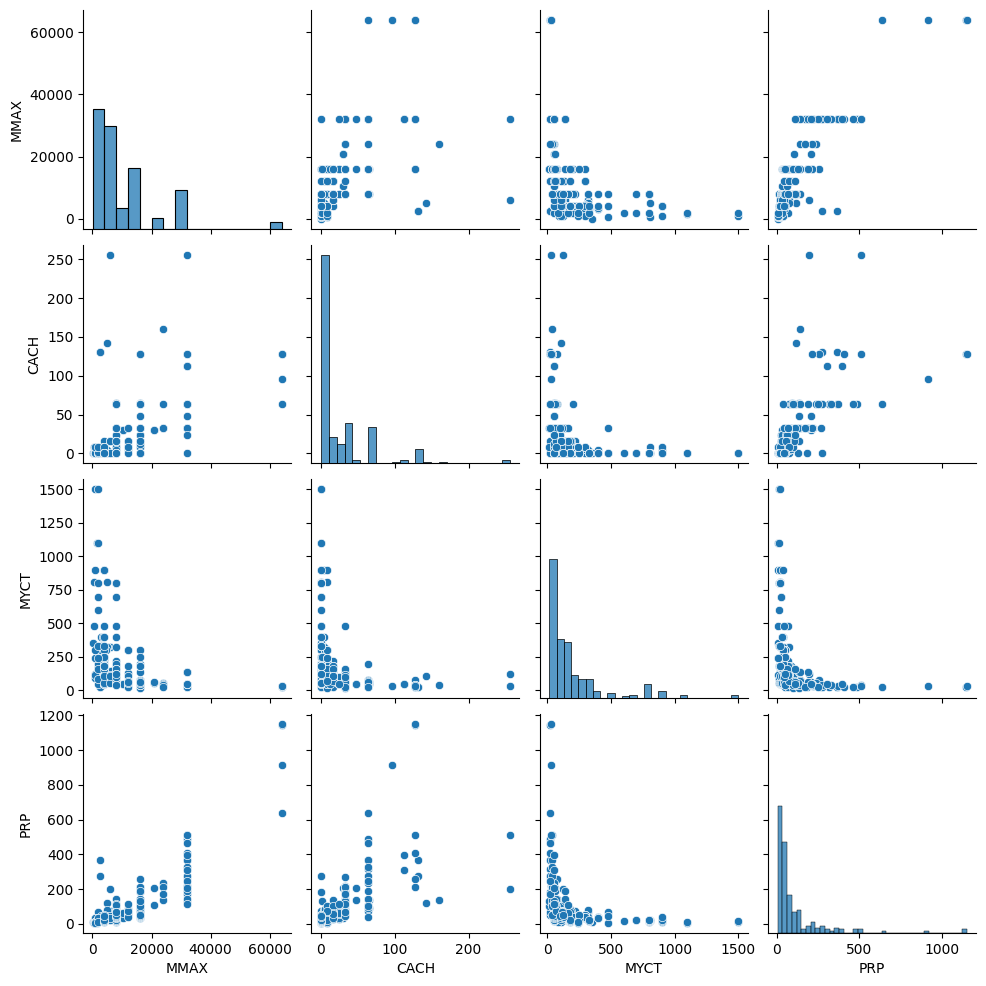

In [44]:
sns.pairplot(df3)
plt.show()

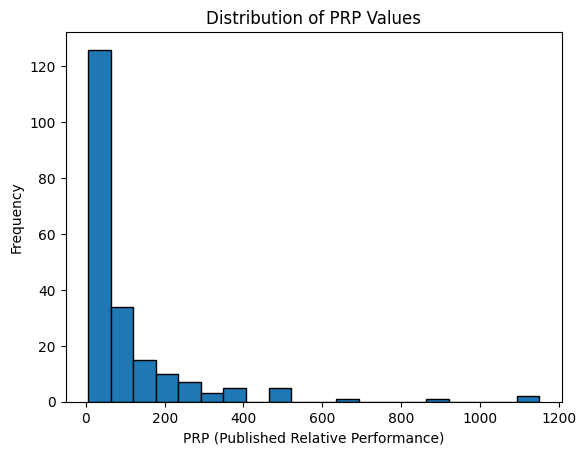

In [45]:
plt.hist(df['PRP'], bins=20, edgecolor='black') 
plt.xlabel('PRP (Published Relative Performance)')
plt.ylabel('Frequency')
plt.title('Distribution of PRP Values')
plt.show()


# 2. Spliting the data

We could already feed our X and y data directly to our linear regression model, but if we use all of our data at once, how can we know if our results are any good? Just like in learning, what we will do, is use a part of the data to train our model and another part of it, to test it

This is easily achieved through the helper train_test_split() method, which accepts our X and y arrays (also works on DataFrames and splits a single DataFrame into training and testing sets), and a test_size.

train_test_split() helper method from from _sklearn.model_selection import train_test_split_

test_size is the percentage of the overall data we'll be using for testing

Some common train-test splits are 80/20 and 70/30. Here I use 80/20

random_state = SEED = Some Number(42) = Splitting data into training/validation/test sets: random seeds ensure that the data is divided the same way every time the code is run


In [46]:
X = df3.iloc[:,:-1]
y = df3.iloc[:,-1]

In [47]:
X

,MMAX,CACH,MYCT
0,6000,256,125
1,32000,32,29
2,32000,32,29
3,32000,32,29
4,16000,32,29
...,...,...,...
204,8000,0,124
205,8000,32,98
206,8000,0,125
207,8000,32,480


In [48]:
y

0      198
1      269
2      220
3      172
4      132
      ... 
204     42
205     46
206     52
207     67
208     45
Name: PRP, Length: 207, dtype: int64

In [49]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=23)

In [50]:
print(X_test.shape)
print(X_train.shape)
print(y_test.shape)
print(y_train.shape)

(42, 3)
(165, 3)
(42,)
(165,)


In [51]:
X_train.head()

,MMAX,CACH,MYCT
8,64000,64,23
124,2000,0,800
20,6300,0,143
106,8000,0,400
147,16000,64,50


In [52]:
y_train.head()

8      636
124     20
20      30
106     32
147    111
Name: PRP, dtype: int64

# 3.Training the Model
- Provide the regression equation and interpret the coefficients of the predictors.

In [53]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [54]:
reg.coef_

array([0.00941926, 1.09604538, 0.03350733])

In [55]:
reg.intercept_

-46.10032259716216

# 4. Testing the model

In [56]:
y_pred = reg.predict(X_test)

In [57]:
df_pred=pd.DataFrame({'Actual':y_test,'Predicted Value': y_pred})
print(df_pred)


     Actual  Predicted Value
69       32         3.863355
86       40        -3.732251
98      185       105.479049
19      120       160.320235
52      138       126.835611
72       22       -21.398018
187      75        78.044689
82       38       123.428420
87       35         5.036112
14       10       -33.769925
103      13         9.596260
193      70        68.214070
18       31       -22.470252
81       38        10.397284
76       45         6.338552
197     397       379.748490
46       18        -5.368363
139      40        -2.377844
67       26       -23.743531
208      45         7.660240
199    1150       698.031432
183      22         3.863355
44       72        81.251696
74       44        -1.214068
75       50        83.559284
55       60        88.153346
170      25       -20.560334
24       23        21.137590
111      37        21.733317
51       24        -3.806671
112      40         7.884234
207      67        80.410737
64      144       177.267813
188     113   

# 5. Evaluation of the model
- Use appropriate metrics to measure the performance of the multiple linear regression model.

In [58]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)

In [59]:
print(mae)
print(mse)
print(rmse)

43.94384408602464
6665.955071933925
81.64530036648726


In [60]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.7963045466977685


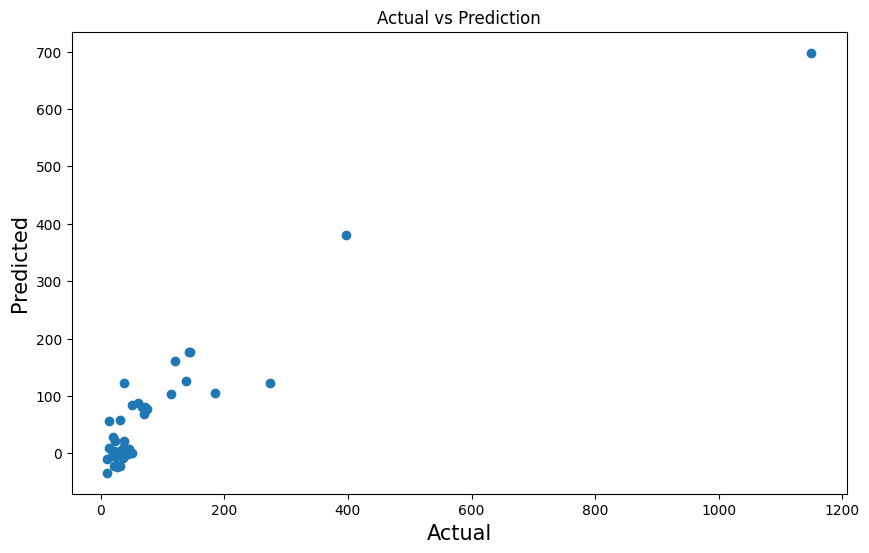

In [61]:
fig, (ax1) = plt.subplots(1, figsize=(10, 6))

ax1.scatter(y_test, y_pred)
ax1.set_title('Actual vs Prediction')
ax1.set_xlabel('Actual', fontsize=15)
ax1.set_ylabel('Predicted', fontsize=15)

plt.show() 